# Tutorial week 3

## Leaning outcomes
1. Read and save images
2. Read and save videos.
3. Resize images.

## Intro of OpenCV in Python
Setup procedure:
1. Install Python and its IDE, preferably Jupyter notebook.
2. Install OpenCV module by the following steps:
    - Open cmd terminal
    - Type in `pip install opencv-contrib-python`.

Before we starts playing around with some of the OpenCV built-in functions, lets briefly walk through what is OpenCV. Created in 1999, OpenCV currently supports a lot of algorithms related to **Computer Vision** and **Machine Learning**. OpenCV supports a wide variety of programming languages like C++, Python and Java and is available on different platforms like Window, Linux and so on.

OpenCV-Python is the Python API of OpenCV. OpenCV-Python is a Python wrapper around original C++ implementation. Another upside of using OpenCV-Python is that OpenCV array structures converted to and from Numpy arrays. So, whatever operations you can do in Numpy, you can combine it with OpenCV. All in all, OpenCV-Python is an appropriate tool for fast prototyping of computer vision problems.

## Setup

In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np

# Make sure that OpenCV optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

## Different formats of images
There are wide variety of image file types out there. We will discuss a few common image formats, including:
1. TIFF(.tif)
    * Used for storing high quality images with detailed color information, thus it is one of the preferred format in printing and publishing.
    * Large file size & limited web support.
2. BMP(.bmp)
    * *Uncompressed* BMP file could have much larger file size compared to JPEG and PNG. 
    * device-independent.
    * Higher quality that JPEG images.
3. GIF(.gif)
    * GIF files can store multiple frames, enabling simple animations.
    * GIF files can have transparent backgrounds, similar to PNG.
    * `cv.imread()` function can't handle this format, we need other external module.
4. JPEG(.jpeg, .jpg, .jfif)
    * *Lossy* compression
    * JPEG is highly popular supported by virtually all image editing softwares and browsers.
5. PNG(.png)
    * *Lossless* compression and supports transparency.
    * Has larger file size compared to JPEG
    * widely supported, similar to JPEG
6. WebP(.webp)
    * Allows websites to display high-quality images.
    * Offers smaller file sizes compared to JPEG and PNG. Uncompressed WebP images are 1.42x smaller than JPEG and 1.7x smaller than PNG ([link](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://photutorial.com/image-format-comparison-statistics/)).

Each format serves different purposes, and the choice depends on the specific needs of image quality, file size, compatibility, and intended use.

| Image file types | Frequent use cases |
| ----- | ----- |
| TIFF | High quality archiving and printing |
| PNG | Web graphics with transparency |
| JPEG | Web use and sharing |
| WebP | Alternatives to JPEG |
| GIF | Animation |
| BMP | High-quality editing |

## Read an image
Let's try to read all the images into the workspace.
Before that, let's set our eye to `imread()` function:
```{python}
cv.imread(filename, flag)
```
It takes 2 arguments:
* `filename` - image file name (Note: specify the whole path if the image is not in the working directory).
* `flag` -  specify how image should be represented.
    - `cv.IMREAD_UNCHANGED` or -1
    - `cv.IMREAD_GRAYSCALE` or 0
    - `cv.IMREAD_COLOR` or 1 (default)
    
More `flag` arguments for `cv.imread()`, please refer to the [online documentation](https://docs.opencv.org/4.x/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80).

## Display image
You can display image using `imshow()` function:
```{python}
cv.imshow(window_name, image)
```
This function takes 2 arguments:
1. `window_name` - window name that will be displayed.
2. `image` - image (Numpy array)

To display multiple images at once, you can <mark>call this function multiple times.</mark>

The `cv.imshow()` function is designed to use alongside `cv.waitKey()` and `cv.destroyAllWindows()` or `cv.destroyWindow()` functions.

`cv.waitKey()` function is a keyboard-binding function. It takes single argument, which is time (miliseconds). If the user press any key within this period, the program continues. If 0 is passed, the program waits indefinitely for a keystroke. You can set the function to detect a specific keystroke like Esc key and any alphabet. For ASCII code of keyboard, please refer to this [link](https://theasciicode.com.ar/).

`cv.destroyAllWindows()` destroys all windows we created. 

display function for mac because original method unable to close cv windows

In [2]:
def display():
    cv.waitKey(5000)
    cv.destroyAllWindows()
    cv.waitKey(1)

In [3]:
img = cv.imread('images/lena.jfif')
img_grayscale = cv.imread('images/lena.jfif', 0)

cv.imshow("original", img)
cv.imshow('grayscale', img_grayscale)
display()

2024-07-16 05:30:33.146 Python[16878:15322891] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [4]:
# TIFF
img = cv.imread('images/lena.tif')
cv.imshow('TIFF image', img)
display()

In [3]:
img = cv.imread('images/lena.png')
cv.imshow('PNG image', img)
display()

2024-07-16 05:32:11.833 Python[16943:15324128] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


**Warning** ⚠️
___
You will run into execution error if you use `cv.imread` on GIF file. The workaround is we need to load the gif to `numpy.ndarray` and change the channel orders. You can refer to this [stackoverflow post](https://stackoverflow.com/questions/48163539/how-to-read-gif-from-url-using-opencv-python) for more info.

In [5]:
import imageio

In [6]:
gif = imageio.mimread('images/rotating_earth_large.gif')
# Convert from RGB to BGR format
imgs = [cv.cvtColor(img, cv.COLOR_RGB2BGR) for img in gif]
cv.imshow('GIF image', imgs[0])
display()

## Save image
The function is `cv.imwrite()`:
```{python}
cv.imwrite(filename, image)
```
It takes 2 arguments:
* `filename` - must include the image file extension, like .jpg, .png, and etc)
* `image` - image (Numpy array)

In [7]:
cv.imwrite('lena_save.jpg', img)

True

## Basic Video operations using OpenCV

A video is nothing but a series of images knit together. These image are often called frames. So, what you need to do is loop over all the frames in sequences, and then process one frame at a time.

### Read and display video from file
Use `cv.VideoCapture()` class to invoke a VideoCapture object which is useful to read video file.
```{python}
cv.VideoCapture(path, apiPreference)
```
The function has 2 arguments:
1. `path` - directory path to the video file. 0 for webcam capture.
2. `apiPreference` - optional

Furthermore, there are some methods related to `VideoCapture` object that are worth mentioning:
* `isOpened()` method returns a boolean indicating whether a video file is opened successfully. 
* `read()` returns the video frame.
* `get()` method retrive metadata associated with the video. It takes one argument (enumerator). `get(3)` --> width of frame, `get(4)` --> height of frame, `get(5)` --> frame rate. More info, please refer to this [online documentation](https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html)

How to read image frames from the file? Create a loop and read one frame at a time from the video stream using `read()` method. It returns a tuple, where the first element is a boolean and the second argument is the video frame.

### Save videos
In order to save a video file, you first need to create a video writer object from `cv.VideoWriter()` class. Syntax for `cv.VideoWriter()`:
```python
cv.VideoWriter(filename, fourcc, fps, framesize, isColor)
```
It takes 5 arguments:
* `filename` - file path name
* `fourcc` - 4-character code of codec. Fourcc is a 32 bit (4 byte) ASCII Character code used to uniquely identifies video formats. Below are the video codecs which corresponds to .avi video.
    - `cv.VideoWriter_fourcc('M', 'J', 'P', 'G')` for .avi video file
    - `cv.VideoWriter_fourcc(*'MP4V')` for .mp4 file
* `fps`: frame rate per second
* `framesize`: (width, height) of frame
* `isColor`: if not zero (default: `True`), the encoder will encode color frames.

The associated method to save the video file is `write(frame)`.

**Note** 🗈
---
> [Fourcc](https://softron.zendesk.com/hc/en-us/articles/207695697-List-of-FourCC-codes-for-video-codecs) is identifier for the video codec, compression format, and color / pixel format in video files. I found combination of _MJPG_ and _.avi_ worked on my laptop and PC running on Windows 11. If your workstations are of different OS, you might have to try out other combinations.

In [8]:
# Create a VideoCapture object
cap = cv.VideoCapture('videos/img_pexels.mp4')

# Check if the object has been created successfully
if not cap.isOpened():
    raise Exception("No video detected")
    
# Read the frames with loop
while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Can't receive frame")
        break
        
    cv.namedWindow("frame", cv.WINDOW_NORMAL)
    cv.imshow('frame', frame)
    # Press Esc key to exit (27 is ASCII code for Esc). cv.waitKey() returns 32 bit integer values. You can find the ASCII table
    # on this URL: https://theasciicode.com.ar/
    if cv.waitKey(1) & 0xFF == 27:
        break
        
cap.release()
display()

In [11]:
# Webcam
cap = cv.VideoCapture(0)

width = int(cap.get(3))
height = int(cap.get(4))
# define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc('M', 'J', 'P', 'G')
fps = 20
out = cv.VideoWriter('videos/out.avi', fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Can't receive frame")
        break
    # horizontal flip    
    frame = cv.flip(frame, 1)
    # write the flipped frame
    out.write(frame)
    
    cv.imshow('frame', frame)
    if cv.waitKey(1) & 0xFF == 27:
        break
        
cap.release()
out.release()
display()

Can't receive frame


## Image resizing
To resize an image, scale it along each axis (height and width), considering the specified _scale factors_ or set the _desired height and width_.

When resizing an image:
- It is important to be mindful of the original aspect ratio of the image.
- Reducing the size of image requires resampling of pixels.
- Enlarging requires reconstruction through interpolation. Common interpolation are available in OpenCV:
    * `cv.INTER_NEAREST`: nearest neighbor interpolation.
    * `cv.INTER_LINEAR`: bilinear interpolation.
    * `cv.INTER_CUBIC`: bicubic interpolation (generally slower).
More info can be found in OpenCV [online documentation](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121)

> **NOTE:** There are a handful of choice of interpolation methods. The details of the methods will not be discussed here, but will be left as exercise.

The function for image resizing is `cv.resize()`:
```python
cv.resize(src, dsize, fx, fy, interpolation)
```
1. First argument is the input image.
2. dsize: the desired output image dimension.
3. fx: scale factor along horizontal axis (width).
4. fy: scale factor along vertical axis (height).
5. interpolation: option flags stated above.

### Example 1: Specify specific output dimension

In [12]:
img = cv.imread('images/soccer.jpg')

cv.imshow('original', img)
display()

In [13]:
new_width = 300
new_height = 450

img_resize = cv.resize(img, (new_width, new_height), interpolation=cv.INTER_LINEAR)

cv.imshow('downscale', img_resize)
display()

### Example 2: Resizing with a scaling factor
The advantage of using scaling factor for resizing is that it keeps the aspect ratio intact and preserve the display quality.

In [14]:
img = cv.imread('images/lena.jfif')

img_resize = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=cv.INTER_LINEAR)

cv.imshow('upscale', img_resize)
display()

## Exercises

1. Load and display the image 'dog.jfif'. Save the image in png format.
2. *Suggest 2 ways and write codes to display 2 images simultaneously.* You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.
3. Write codes that performs the following:
    * Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
    * Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"
4. Enlarge the image "dog.jfif" by using different techniques:
    1) Linear   
   2) Cubic interpolation
   3) Nearest neighbor interpolation.

Perform profiling on each method. Comment on the **execution times** and **quality of resulting images**.

In [15]:
#Exercises 1
img = cv.imread('images/dog.jfif')
cv.imshow('dog.jfif',img)
display()
output_path = 'images/dog.png'
cv.imwrite(output_path, img)
output_path

'/Users/fuji/Documents/notes/Y3S1/miniProject/week 3/codes/images/dog.png'

In [16]:
#Exercises 2
#Method 1

# Read the image
image = cv.imread('images/dog.png')
# Convert the image to grayscale
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Concatenate images horizontally
concatenated_image = np.hstack((image, cv.cvtColor(image_gray, cv.COLOR_GRAY2BGR)))

# Display the concatenated image
cv.imshow('Original and Grayscale Image', concatenated_image)
display()

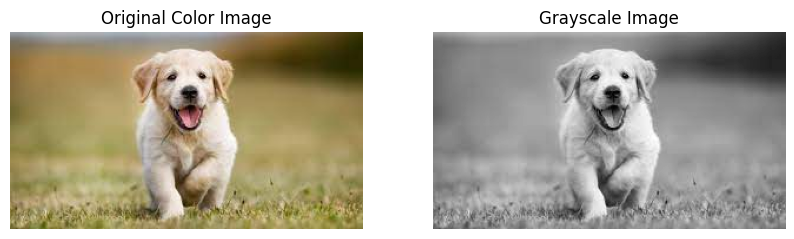

In [26]:
import matplotlib.pyplot as plt


# Read the image
image = cv.imread('images/dog.png')
# Convert the image to RGB (OpenCV reads images in BGR format)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# Convert the image to grayscale
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Plot the images
plt.figure(figsize=(10, 5))

# Plot the original color image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Color Image')
plt.axis('off')

# Plot the grayscale image
plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()


In [32]:
#Exercise 3

def resize_frame(frame, scale):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    return cv.resize(frame, (width, height))

frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
output_path = 'videos/smaller_img_pexels.mp4'
fourcc = cv.VideoWriter_fourcc(*'mp4v')  # Use 'XVID' for .avi
output_fps = 24  # Specify an arbitrary frame rate
output_size = (int(frame_width * 0.5), int(frame_height * 0.5))  # Smaller frame size
out = cv.VideoWriter(output_path, fourcc, output_fps, output_size)

# Create a VideoCapture object
cap = cv.VideoCapture('videos/img_pexels.mp4')

# Check if the object has been created successfully
if not cap.isOpened():
    raise Exception("No video detected")
    
# Read the frames with loop
while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Can't receive frame")
        break
        
    cv.namedWindow("frame", cv.WINDOW_NORMAL)
    resized_frame = resize_frame(frame, 0.3)
    cv.imshow('frame', resized_frame)
    out.write(resized_frame)
    # Press Esc key to exit (27 is ASCII code for Esc). cv.waitKey() returns 32 bit integer values. You can find the ASCII table
    # on this URL: https://theasciicode.com.ar/
    if cv.waitKey(1) & 0xFF == 27:
        break
        
cap.release()
display()

(np.float64(-0.5), np.float64(199.5), np.float64(199.5), np.float64(-0.5))

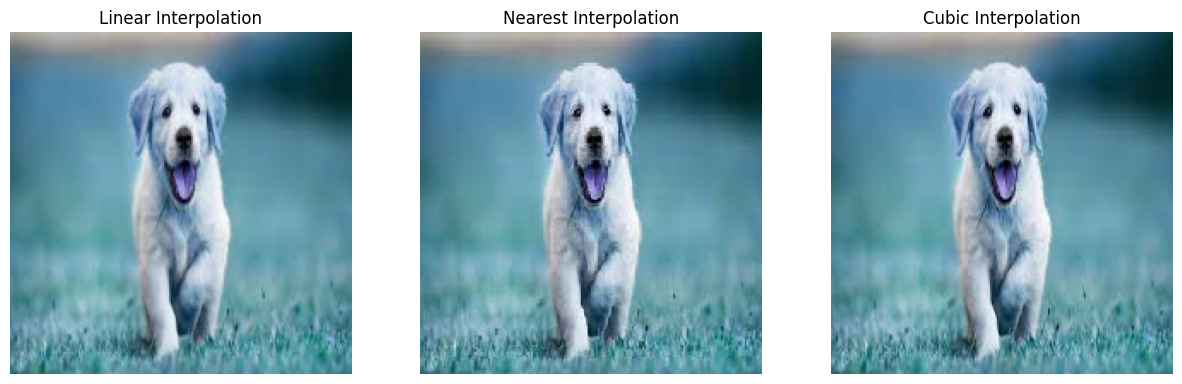

In [31]:
new_width = 200
new_height = 200
img = cv.imread('images/dog.png')

img_resize_linear = cv.resize(img, (new_width, new_height), interpolation=cv.INTER_LINEAR)
img_resize_nearest = cv.resize(img, (new_width, new_height), interpolation=cv.INTER_NEAREST)
img_resize_cubic = cv.resize(img, (new_width, new_height), interpolation=cv.INTER_CUBIC)

plt.figure(figsize=(15, 5))

# Display the linear interpolation
plt.subplot(1, 3, 1)
plt.imshow(img_resize_linear)
plt.title('Linear Interpolation')
plt.axis('off')

# Display the nearest interpolation
plt.subplot(1, 3, 2)
plt.imshow(img_resize_nearest)
plt.title('Nearest Interpolation')
plt.axis('off')

# Display the cubic interpolation
plt.subplot(1, 3, 3)
plt.imshow(img_resize_cubic)
plt.title('Cubic Interpolation')
plt.axis('off')